In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


In [3]:
# Load the file
who_csv = Path('../Project 1 - Group 3/Resources/WHO-COVID-19-global-data.csv')
layoff_csv = Path('../Project 1 - Group 3/Resources/layoff_2021.csv')
quit_csv = Path('../Project 1 - Group 3/Resources/quit_2021.csv')

# Read data sets for new deaths, layoffs, and voluntary withdrawl
who_data = pd.read_csv(who_csv)
layoff_data = pd.read_csv(layoff_csv)
quit_data = pd.read_csv(quit_csv)


Start Work on Labor Bureau Statistics

In [4]:
# Clean up labor data of layoffs to show only 2021
layoff_data_2021 = layoff_data[layoff_data['Year']==2021]

# Clean up labor data to include only period and value
layoff_data_2021 = layoff_data_2021[['Period', 'Value']]

# Rename period to month and value to layoff/quit by the thousand
layoff_data_2021 = layoff_data_2021.rename(columns={'Period':'Month', 'Value':'Layoff'})


In [5]:
# Clean up labor data for quitting to show only 2021
quit_data_2021 = quit_data[quit_data['Year']==2021]


# Clean up labor data for quitting to include only period and value
quit_data_2021 = quit_data_2021[['Period', 'Value']]

# Rename period to month and value to layoff/quit by the thousand
quit_data_2021 = quit_data_2021.rename(columns={'Period':'Month', 'Value':'Quit'})

In [6]:
# Show only the layoff/quit per thousand
layoff_data_2021 = layoff_data_2021[['Layoff']]
quit_data_2021 = quit_data_2021[['Quit']]

# Reset the index so we can merge the csv later on
layoff_data_2021 = layoff_data_2021.reset_index(drop=True)
quit_data_2021 = quit_data_2021.reset_index(drop=True)



In [7]:
# Merge the two csv on index
merge_labor_df = pd.merge(layoff_data_2021, quit_data_2021, left_index=True, right_index=True)

Start Work on WHO Data

In [8]:
# Set 'Date_reported' as the index
who_data = who_data.set_index('Date_reported')

# Convert the index to datetime format
who_data.index=pd.to_datetime(who_data.index)

In [9]:
# Convert the index to datetime format in individual columns
who_data.index=pd.to_datetime(who_data.index)
who_data['Year'] = who_data.index.year
who_data['Month'] = who_data.index.month
who_data['Day'] = who_data.index.day


who_data.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020,1,3
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020,1,4
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020,1,5
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020,1,6
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020,1,7


In [10]:
# Isolate data on the US
us_new_deaths = who_data[who_data['Country']=='United States of America']


In [11]:
# Create a new dataframe with only 2021 for the U.S.
us_newdeath_2021 = us_new_deaths[us_new_deaths['Year']==2021]

In [12]:
# Group by month and get the sum of new deaths and reset index
us_months = us_newdeath_2021.groupby('Month')['New_deaths'].sum()
us_months = us_months.reset_index(drop=True)


In [13]:
# Merge WHO data and Labor data
final_df = pd.merge(merge_labor_df, us_months, left_index = True, right_index=True)

# Print to check 
print(final_df)

    Layoff  Quit  New_deaths
0     2705   654      100119
1     2259   707       67730
2     2086   769       33397
3     2072   819       20768
4     1829   786       17442
5     1814   944        9459
6     1220   926        9045
7     1213   827       31496
8     1094   789       54691
9     1026   844       48578
10     870   839       31309
11     801   725       43017


In [14]:
# Insert new column with months 
new_col_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
final_df['Months'] = new_col_months

# Move the month column to the left
reordered_column = ['Months', 'New_deaths', 'Layoff', 'Quit']
final_df = final_df[reordered_column]

# Rename 'New_deaths' to New Deaths
final_df = final_df.rename(columns={'New_deaths' : 'New Deaths'})

final_df = final_df.set_index('Months')

final_df

,New Deaths,Layoff,Quit
Months,,,
Jan,100119,2705,654
Feb,67730,2259,707
Mar,33397,2086,769
Apr,20768,2072,819
May,17442,1829,786
Jun,9459,1814,944
Jul,9045,1220,926
Aug,31496,1213,827
Sept,54691,1094,789


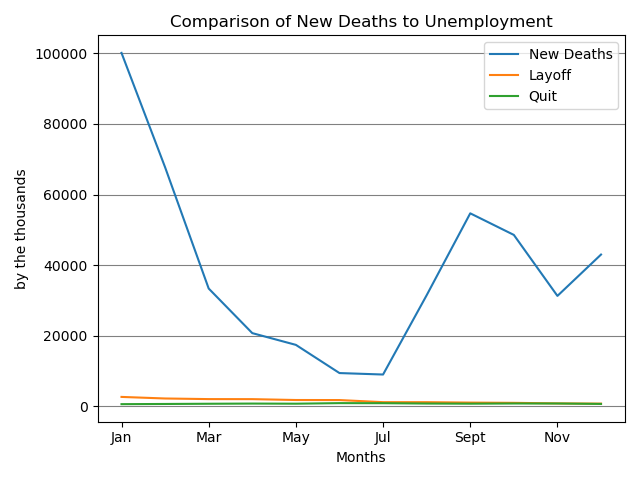

In [15]:
# Plot the line graph
final_df.plot(kind='line', alpha = .99)
plt.title('Comparison of New Deaths to Unemployment')
plt.ylabel('by the thousands')
plt.tight_layout()
plt.grid(True, axis ='y', color="gray")

# Save the graph
plt.savefig('../Project 1 - Group 3/New Deaths to Unemployment - Line Graph')

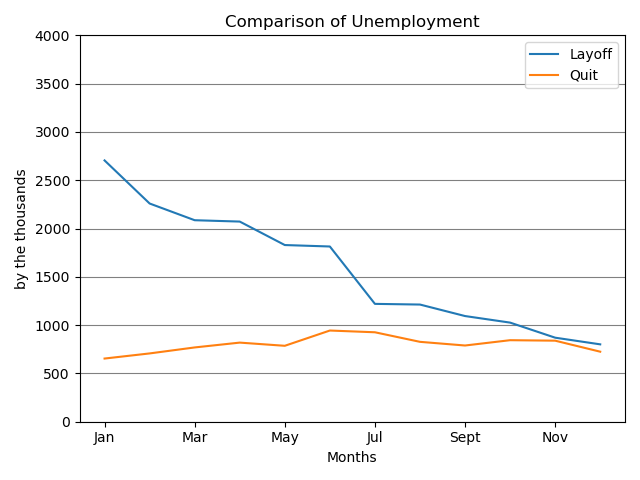

In [16]:
# Plot the line graph with a lower y-axis limit to show unemployment trends
unemployment_df = final_df[['Layoff', 'Quit']]
unemployment_df.plot(kind='line', alpha = .99)
plt.title('Comparison of Unemployment')
plt.ylabel('by the thousands')
plt.tight_layout()
plt.grid(True, axis ='y', color="gray")
plt.ylim(0, 4000)
# Save the graph
plt.savefig('../Project 1 - Group 3/New Deaths to Unemployment - Line Graph2')